### get data from https://www.kaggle.com/c/digit-recognizer/data?select=train.csv

In [21]:
import pandas as pd
train = pd.read_csv('digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train.shape

(42000, 785)

In [23]:
784**0.5 # 28 x 28 image

28.0

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
train.groupby(['label'])['label'].count()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

### randomly display 9 samples along with class

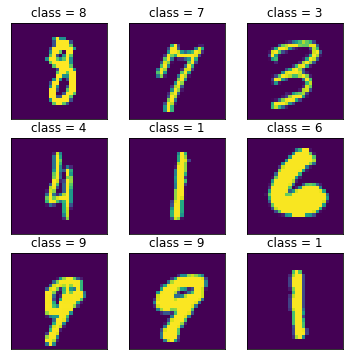

In [57]:
index = np.random.randint(0, train.shape[0], size=9)
fig, axis = plt.subplots(3, 3, figsize=(6,6))
for i in range(3):
    for j in range(3):
        idx = index[3*i + j]
        label = train.label[idx]
        data = train.iloc[idx,1:]
        img = np.array(data).reshape((28,28))
        axis[i][j].set_xticks([])
        axis[i][j].set_yticks([])
        axis[i][j].set_title(f'class = {label}')
        axis[i][j].imshow(img)

training and test splits

In [61]:
# approx 4000 images from each classes
(5000/train.shape[0]) * 100 # 11 % data for testing >> 500 samples from each classes for testing

11.904761904761903

In [117]:
labels = np.array(train.label)
labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [118]:
np.random.seed(110)
test_samples_from_each_class = 500
train_idxs=[]
test_idxs=[]
for digit in range(10):
    arr = np.where(labels == digit)[0]
    np.random.shuffle(arr)
    test_idxs.extend(list(arr)[:test_samples_from_each_class])
    train_idxs.extend(list(arr)[test_samples_from_each_class:])

In [121]:
len(set(train_idxs + test_idxs)) == train.shape[0] # sanity checks

True

In [125]:
len(test_idxs)

5000

In [126]:
train_data = train.iloc[train_idxs,:]
test_data = train.iloc[test_idxs,:]
train_data.shape, test_data.shape

((37000, 785), (5000, 785))

In [159]:
temp = train_x, train_y, test_x, test_y = train_data.iloc[:,1:], train_data.iloc[:,0], test_data.iloc[:,1:], test_data.iloc[:,0]

In [131]:
[i.shape for i in temp]

[(37000, 784), (37000,), (5000, 784), (5000,)]

In [160]:
train_x, test_x = train_x.values, test_x.values

In [161]:
train_x, test_x, train_x.shape, test_x.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 (37000, 784),
 (5000, 784))

In [162]:
train_y, test_y = train_y.values, test_y.values
train_y, test_y, train_y.shape, test_y.shape

(array([0, 0, 0, ..., 9, 9, 9], dtype=int64),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int64),
 (37000,),
 (5000,))

In [152]:
import tensorflow as tf

In [163]:
train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

In [164]:
train_y, test_y, train_y.shape, test_y.shape

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
 (37000, 10),
 (5000, 10))

### data preparation complete
### ('_') Hurray

### data normalization

In [165]:
train_x, test_x = train_x/255, test_x/255
train_x, test_x, train_x.shape, test_x.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (37000, 784),
 (5000, 784))

### create neural network architecture

In [183]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, RMSprop 

In [181]:
model = Sequential([
    Dense(1, activation='relu', input_shape=(784,)),
    Dense(10)
])

In [184]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [190]:
model.fit(train_x, train_y, batch_size=None, epochs=100, validation_data=(test_x, test_y))

Epoch 1/100
1157/1157 [==============================] - 1s 913us/step - loss: 1.5702 - accuracy: 0.3975 - val_loss: 1.6017 - val_accuracy: 0.3830
Epoch 2/100
1157/1157 [==============================] - 1s 931us/step - loss: 1.5699 - accuracy: 0.3977 - val_loss: 1.6091 - val_accuracy: 0.3810
Epoch 3/100
1157/1157 [==============================] - 1s 895us/step - loss: 1.5696 - accuracy: 0.3976 - val_loss: 1.6014 - val_accuracy: 0.3900
Epoch 4/100
1157/1157 [==============================] - 1s 929us/step - loss: 1.5687 - accuracy: 0.3986 - val_loss: 1.6035 - val_accuracy: 0.3916
Epoch 5/100
1157/1157 [==============================] - 1s 903us/step - loss: 1.5688 - accuracy: 0.3968 - val_loss: 1.6044 - val_accuracy: 0.3840
Epoch 6/100
1157/1157 [==============================] - 1s 934us/step - loss: 1.5688 - accuracy: 0.3985 - val_loss: 1.6093 - val_accuracy: 0.3866
Epoch 7/100
1157/1157 [==============================] - 1s 939us/step - loss: 1.5692 - accuracy: 0.3964 - val_loss: 1

Epoch 57/100
1157/1157 [==============================] - 1s 1ms/step - loss: 1.5612 - accuracy: 0.4071 - val_loss: 1.5975 - val_accuracy: 0.3882
Epoch 58/100
1157/1157 [==============================] - 1s 1ms/step - loss: 1.5604 - accuracy: 0.4071 - val_loss: 1.5966 - val_accuracy: 0.3872
Epoch 59/100
1157/1157 [==============================] - 1s 1ms/step - loss: 1.5605 - accuracy: 0.4084 - val_loss: 1.5960 - val_accuracy: 0.3844
Epoch 60/100
1157/1157 [==============================] - 1s 1ms/step - loss: 1.5597 - accuracy: 0.4086 - val_loss: 1.6024 - val_accuracy: 0.3882
Epoch 61/100
1157/1157 [==============================] - 1s 1ms/step - loss: 1.5599 - accuracy: 0.4103 - val_loss: 1.6026 - val_accuracy: 0.3808
Epoch 62/100
1157/1157 [==============================] - 1s 1ms/step - loss: 1.5599 - accuracy: 0.4073 - val_loss: 1.5994 - val_accuracy: 0.3866
Epoch 63/100
1157/1157 [==============================] - 1s 1ms/step - loss: 1.5603 - accuracy: 0.4084 - val_loss: 1.5987 -

### do the prediction and submit to kaggle

In [191]:
test = pd.read_csv('digit-recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
input_x = test.values/255

In [198]:
input_x, input_x.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (28000, 784))

In [196]:
predictions = model.predict(input_x)
predictions

array([[ -3.8039222 ,  -3.0549421 ,  -1.3545008 , ...,  -9.701936  ,
         -1.7332773 ,  -8.310562  ],
       [ -0.6697655 ,  -8.07248   ,  -3.2129462 , ...,  -3.04461   ,
         -1.5100856 ,  -2.351355  ],
       [  0.96177745, -10.684451  ,  -4.180394  , ...,   0.42098188,
         -1.3938991 ,   0.7508187 ],
       ...,
       [ -1.9317718 ,  -6.052108  ,  -2.4646206 , ...,  -5.7252626 ,
         -1.5999564 ,  -4.7509017 ],
       [  2.4698963 , -13.09883   ,  -5.0746555 , ...,   3.6244075 ,
         -1.2865019 ,   3.6183176 ],
       [ -4.2462463 ,  -2.346817  ,  -1.0922184 , ..., -10.641484  ,
         -1.7647763 ,  -9.151585  ]], dtype=float32)

In [212]:
ImageId = list(range(1, predictions.shape[0]+1))
Label = list(np.argmax(predictions, axis=1))
df_out = pd.DataFrame({'ImageId':ImageId, 'Label':Label})
df_out.head()

,ImageId,Label
0,1,2
1,2,0
2,3,4
3,4,3
4,5,2


In [216]:
df_out.to_csv('digit-recognizer/submissions/submit0.csv', index=False)